# Create novel NeuroML models from components on NeuroML-DB

This notebook demonstrates how to access the [NeuroML-DB database](https://neuroml-db.org), extract elements in NeuroML format and use them to create new models

In [1]:
from pyneuroml import pynml
import urllib.request, json 
import requests

## 1) Search for, download and analyse channels accessed via API

### 1.1) Search in the database for a particular type of channel


In [2]:
types = {'cell':'NMLCL','channel':'NMLCH'}

# Helper method for search
def search_neuromldb(search_term, type=None):
    
    with urllib.request.urlopen('https://neuroml-db.org/api/search?q=%s' % search_term.replace(' ','%20')) as url:
        data = json.load(url)

    for l in data:
        if type!=None:
            for type_ in types:
                if type==type_ and not types[type_] in l['Model_ID']:
                    data.remove(l)
        if l in data:
            print('%s: %s, %s %s %s'%(l['Model_ID'],l['Name'],l['First_Author'],l['Second_Author'],l['Publication_Year']))
        
    return data

data = search_neuromldb("Fast Sodium", 'channel')

NMLCH000008: NaF Inactivating Fast Sodium, None De Schutter 1998
NMLCH000023: NaF Inactivating Fast Sodium, None De Schutter 1998
NMLCH000110: NaTa Fast Inactivating Sodium, None Pan 2002
NMLCH000111: NaTs Fast Inactivating Sodium, None Pan 2002
NMLCH000131: NaF Fast Sodium, None Toledo-Rodriguez 2008
NMLCH000157: NaF Fast Transient Inactivating Sodium, None Buhl 2003
NMLCH000158: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000159: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000160: NaF Fast Transient Inactivating Sodium, None Buhl 2003
NMLCH000161: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000162: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000163: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000164: NaP Persistent Noninactivating Sodium, None Buhl 2003
NMLCH000165: NaF Fast Transient Inactivating Sodium, None Contreras 2005
NMLCH000166: NaF Fast Transient Inactivating Sodium, Non

### 1.2) Select one of these results and download it, and browse the contents

In [3]:
# Helper method to retrieve a NeuroML file based on modelID
def get_model_from_neuromldb(model_id, type):
  
    fname = '%s.%s.nml'%(model_id, type)

    url = 'https://neuroml-db.org/render_xml_file?modelID=%s'%model_id
    r = requests.get(url)
    with open(fname , 'wb') as f:
        f.write(r.content)

    return pynml.read_neuroml2_file(fname), fname


# Choose one of the channels
chan_model_id = data[2]['Model_ID']

na_chan_doc, na_chan_fname = get_model_from_neuromldb(chan_model_id, 'channel')

na_chan = na_chan_doc.ion_channel[0] # select the first/only ion channel in the nml doc

print('Channel %s has notes: %s'%(na_chan.id, na_chan.notes))

pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000110.channel.nml


Channel NaTa_t has notes: Fast inactivating Na+ current
            
Comment from original mod file: 
:Reference :Colbert and Pan 2002


### 1.3) Plot the time course and steady state of this channel

pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000110.channel.nml
pyNeuroML >>> INFO - Including included files (included already: [])
pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000110.channel.nml
pyNeuroML >>> INFO - Including included files (included already: [])
pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000110.channel.nml
pyNeuroML >>> INFO - Loading LEMS file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_NaTa_t.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/Users/padraig/anaconda/envs/py37/lib/python3.7/site-packages/pyNeuroML-0.7.3-py3.7.egg/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar"  "/Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_NaTa_t.xml"  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Loading: /Users/padraig/git/Documentation/source/Userdocs/NML2_examp

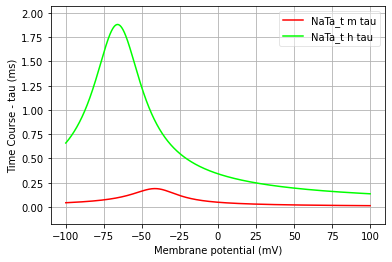

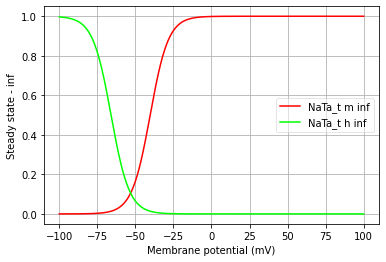

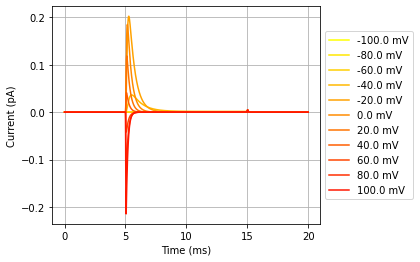

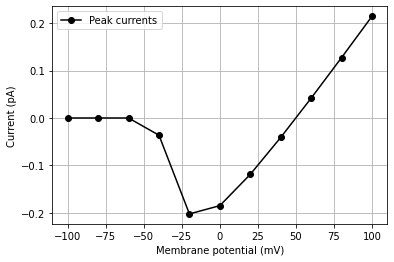

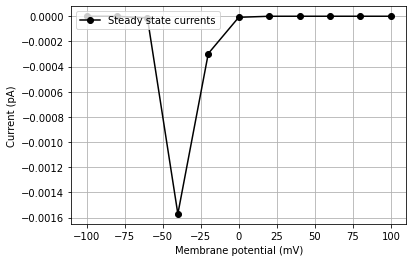

In [4]:
from pyneuroml.analysis.NML2ChannelAnalysis import run

na_erev = 50 # mV
run(channel_files=[na_chan_fname], ivCurve=True, erev=na_erev, clampDelay=5, clampDuration=10, duration=20)


### 1.4) Find a Potassium channel

NMLCH000113: K Fast Noninactivating Potassium, None Wunder 1992
NMLCH000128: IM Slow M Type Potassium, None Wang 1993
NMLCH001394: K Fast Noninactivating Potassium, None Hill 2011
NMLCH001465: K Fast Noninactivating Potassium, Berg Feng 2018


pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000113.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000113.channel.nml
pyNeuroML >>> INFO - Including included files (included already: [])
pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000113.channel.nml
pyNeuroML >>> INFO - Including included files (included already: [])
pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000113.channel.nml
pyNeuroML >>> INFO - Loading LEMS file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/Users/padraig/anaconda/envs/py37/lib/python3.7/site-packages/pyNeuroML-0.7.3-py3.7.egg/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar"  "/Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml"  -nogui -I '') in directory: .


Channel SKv3_1 has notes: Fast, non inactivating K+ current
            
Comment from original mod file: 
:Reference : :		Characterization of a Shaw-related potassium channel family in rat brain, The EMBO Journal, vol.11, no.7,2473-2486 (1992)


pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Loading: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml with jLEMS, NO GUI mode...
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO) Loading LEMS file from: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO) Reading from: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO) Finished 40000 steps in 2.75 seconds (sim duration: 100.0ms; dt: 0.0025ms)
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO) Written to the file /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/./SKv3_1.m.inf.lems.dat 863496
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO) Written to the file /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/./SKv3_1.m.tau.lems.dat 918896
  jNeuroML >>  INFO Nov 08,2022 10:30  (INFO

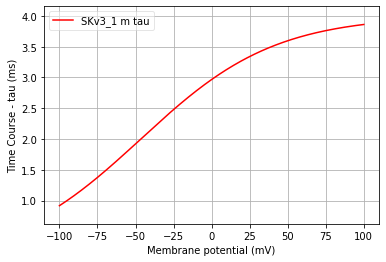

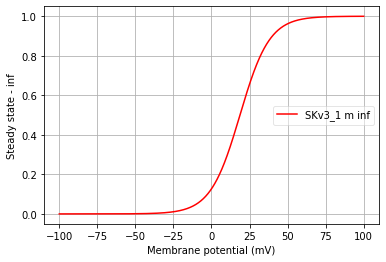

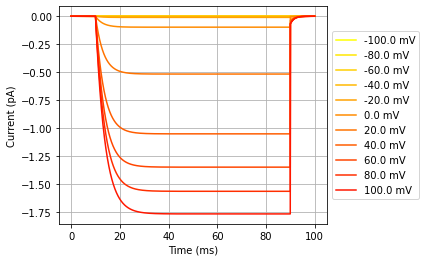

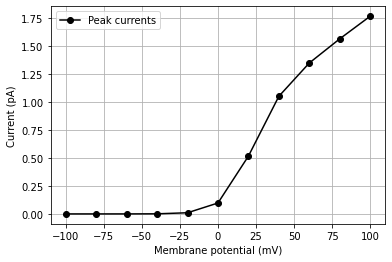

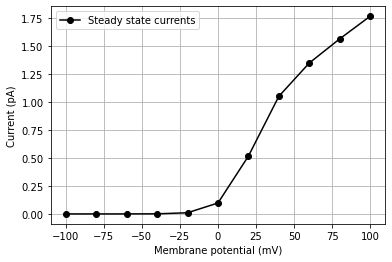

In [5]:
# Look at content of file
#!cat NMLCH000008.channel.nml

data = search_neuromldb("Noninactivating Potassium", 'channel')

k_chan_doc, k_chan_fname = get_model_from_neuromldb(data[0]['Model_ID'], 'channel')
k_chan = k_chan_doc.ion_channel[0] # select the first ion channel in the nml doc

print('Channel %s has notes: %s'%(k_chan.id, k_chan.notes))

k_erev = -77
run(channel_files=[k_chan_fname], ivCurve=True, erev=k_erev)


### 1.5)  Find a passive current


In [6]:
data = search_neuromldb("Leak", 'channel')

pas_chan_doc, pas_chan_fname = get_model_from_neuromldb(data[0]['Model_ID'], 'channel')
pas_chan = pas_chan_doc.ion_channel[0] # select the first ion channel in the nml doc

print('Channel %s has notes: %s'%(pas_chan.id, pas_chan.notes))

NMLCH000007: Passive Leak, None Ferrante 2005
NMLCH000015: Passive Leak, None De Schutter 1998
NMLCH000016: Passive Leak, None De Schutter 1998
NMLCH000024: Passive Leak, None De Schutter 1998
NMLCH000027: Passive Leak, None Bower 1994
NMLCH000095: Passive Leak, None Lorincz 2010
NMLCH000114: Passive Leak, None Huxley 1952
NMLCH000130: Passive Leak, None Toledo-Rodriguez 2008
NMLCH000139: Passive Leak, None Huxley 1952
NMLCH000172: Passive Leak, None Contreras 2005
NMLCH001403: Passive Leak, None Hill 2011
NMLCH001427: Passive Leak, None Huxley 1952
NMLCH001471: Passive Leak, Berg Feng 2018
NMLCH001545: Passive Leak, Cohen None 2008
NMLCH001590: Passive Leak, Bucher Marder 2004
NMLCH001601: Passive Leak, Smith Branco 2013
NMLCH001623: Passive Leak, Raikov Burk 2016


pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000007.channel.nml


Channel pas has notes: Simple example of a leak/passive conductance. Note: for GENESIS cells with a single leak conductance,
        it is better to use the Rm and Em variables for a passive current.


## 2) Create a new cell model using these channels

### 2.1) Create the Cell object, add channels and save to file

In [27]:
from neuroml import *
from neuroml.utils import component_factory
import neuroml.writers as writers


nml_doc = NeuroMLDocument(id="TestCell")

cell = component_factory("Cell", id="complex_cell")
nml_doc.add(cell)

cell.add_segment(prox=[0,0,0,17.841242], 
                 dist=[0,0,0,17.841242], 
                 seg_type='soma')

cell.set_resistivity('0.03 kohm_cm')
cell.set_init_memb_potential('-65mV')
cell.set_specific_capacitance('1.0 uF_per_cm2')
cell.set_spike_thresh('0mV')


cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%na_chan.id,
                        ion_channel=na_chan.id,
                        cond_density='100 mS_per_cm2',
                        ion_chan_def_file=na_chan_fname,
                        erev="%s mV"%na_erev)

cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%k_chan.id,
                        ion_channel=k_chan.id,
                        cond_density='56 mS_per_cm2',
                        ion_chan_def_file=k_chan_fname,
                        erev="%s mV"%k_erev)

cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%pas_chan.id,
                        ion_channel=pas_chan.id,
                        cond_density='0.3 mS_per_cm2',
                        ion_chan_def_file=pas_chan_fname,
                        erev="-65 mV")



nml_file = "%s.net.nml"%nml_doc.id
writers.NeuroMLWriter.write(nml_doc, nml_file)


print("Written network file to: " + nml_file)

from neuroml.utils import validate_neuroml2

validate_neuroml2(nml_file)

#!cat TestCell.net.nml


pynml.summary(nml_doc, verbose=True)

Written network file to: TestCell.net.nml
It's valid!
*******************************************************
* NeuroMLDocument: TestCell
*
*
*  Cell: complex_cell
*    <Segment|0|Seg0>
*      Parent segment: None (root segment)
*      (0.0, 0.0, 0.0), diam 17.841242um -> (0.0, 0.0, 0.0), diam 17.841242um; seg length: 0.0 um
*      Surface area: 1000.0000939925986 um2, volume: 2973.540612824116 um3
*    Total length of 1 segment: 0.0 um; total area: 1000.0000939925986 um2
*  
*    SegmentGroup: soma_group,	1 member(s),	0 included group(s);	contains 1 segment, id: 0
*    SegmentGroup: axon_group,	0 member(s),	0 included group(s);	contains 0 segments in total
*    SegmentGroup: dendrite_group,	0 member(s),	0 included group(s);	contains 0 segments in total
*    SegmentGroup: all,	1 member(s),	0 included group(s);	contains 1 segment, id: 0
*  
*    Channel density: NaTa_t_chans on all;	conductance of 100 mS_per_cm2 through ion chan NaTa_t with ion non_specific, erev: 50 mV
*      Channel i

### 2.2) Generate a plot of the actvity of the cell under current clamp input

pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/TestCell.net.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NMLCH000110.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NMLCH000113.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NMLCH000007.channel.nml
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/Users/padraig/anaconda/envs/py37/lib/python3.7/site-packages/pyNeuroML-0.7.3-py3.7.egg/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar" -validate "iv_complex_cell.net.nml" ) in directory: .
pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Validating: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/iv_complex_cell.net.nml
  jNeuroML >>  Valid against sche

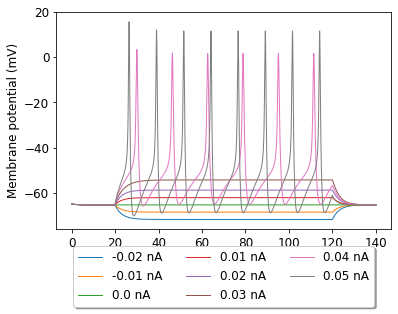

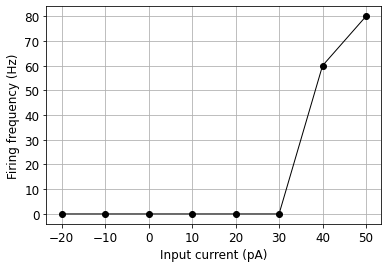

{-0.02: 0, -0.01: 0, 0.0: 0, 0.01: 0, 0.02: 0, 0.03: 0, 0.04: 60.0, 0.05: 80.0}

In [29]:
from pyneuroml.analysis import generate_current_vs_frequency_curve

generate_current_vs_frequency_curve(nml_file,
    cell.id,
    start_amp_nA=-0.02,
    end_amp_nA=0.06,
    step_nA=0.01,
    pre_zero_pulse=20,
    post_zero_pulse=20,
    analysis_duration=100,
    plot_voltage_traces=True)


## Create simple network model from cell accessed via API


In [30]:
# todo...